<a href="https://colab.research.google.com/github/LouLouoffer/Data-Analyst-Project/blob/main/DA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Setup Google Drive Environment / Data Collection

import data from google drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
# the same way we get id from last class
#https://docs.google.com/spreadsheets/d/1N4-QCInpgFrSCA-y5Qh-bu3-Et6fK-B2/edit?usp=sharing&ouid=117020772964111352188&rtpof=true&sd=true
id = "1N4-QCInpgFrSCA-y5Qh-bu3-Et6fK-B2"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('zjy_info.xlsx')

In [ ]:
import pandas as pd
zjy_info = pd.read_excel('zjy_info.xlsx')
zjy_info.head()

,序号,姓名,性别,新证书资格编号,资格证专业,第二专业,第三专业,执业资格,现执业单位,职称,...,身份证号,所在地,民族,学历,毕业时间,毕业院校,所学专业,造价工作年限,考试通过年度,续期到期时间
0,1.0,赵贵云,男,甘050000001,安装工程,NaN,NaN,全国造价员,甘肃省建设工程造价管理总站,NaN,...,NaN,省属,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42735.0
1,2.0,任建彪,男,甘050000002,建筑工程,NaN,NaN,全国造价员,甘肃省建设工程造价管理总站,NaN,...,NaN,省属,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42735.0
2,3.0,马永林,男,甘050000003,建筑工程,NaN,NaN,全国造价员,甘肃省建设工程造价管理总站,NaN,...,NaN,省属,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42735.0
3,4.0,冯建平,男,甘050000004,安装工程,NaN,NaN,全国造价员,甘肃省建设工程造价管理总站,NaN,...,NaN,省属,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42735.0
4,5.0,顾正平,男,甘050000006,建筑工程,NaN,NaN,全国造价员,甘肃省建设工程造价管理总站,NaN,...,NaN,省属,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42735.0


In [ ]:
#删除nan
zjy_info = zjy_info.where(zjy_info.notnull(), None)

In [ ]:
#检查中文库，Colab的虚拟机 Ubuntu 操作系统没有支持中文的字体
!fc-list :lang=zh

In [ ]:
# 下载--解压--移动字体文件
!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"
!mv SimHei.ttf /usr/share/fonts/truetype/

--2022-10-11 14:19:27--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  21.7MB/s    in 0.5s    

2022-10-11 14:19:27 (21.7 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
  inflating: chinese.simhei.ttf      
  inflating: SimHei.ttf              
  inflating: sharefonts.net.txt      


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False

# 信息探索

### 造价员信息了解

In [ ]:
zjy_info.nunique()

序号         13988
姓名         12732
性别             5
新证书资格编号    13988
资格证专业          3
第二专业          17
第三专业         128
执业资格           4
现执业单位       3703
职称            29
存档单位        1158
初始注册单位      1483
手机         12922
办公室         4637
地址          6207
邮政编码         235
身份证号       13885
所在地           33
民族            17
学历            12
毕业时间         632
毕业院校        1889
所学专业        1013
造价工作年限        77
考试通过年度       116
续期到期时间         4
dtype: int64

#### 姓名

In [ ]:
zjy_info['姓名'] = zjy_info['姓名'].str.strip()

In [ ]:
zjy_info['姓名'].value_counts()
#共有1261人至少与其他一人重名

王娟     14
张静     13
李静     12
张燕     10
王丽     10
       ..
范振鹏     1
鲁兴      1
王福德     1
王爱荣     1
岳燕燕     1
Name: 姓名, Length: 12728, dtype: int64

#### 职称

In [ ]:
#职称缺失值共有4000多条
zjy_info[zjy_info['职称'].isnull()]

,序号,姓名,性别,新证书资格编号,资格证专业,第二专业,第三专业,执业资格,现执业单位,职称,...,身份证号,所在地,民族,学历,毕业时间,毕业院校,所学专业,造价工作年限,考试通过年度,续期到期时间
0,1.0,赵贵云,男,甘050000001,安装工程,None,None,全国造价员,甘肃省建设工程造价管理总站,None,...,None,省属,None,None,None,None,None,None,None,42735.0
1,2.0,任建彪,男,甘050000002,建筑工程,None,None,全国造价员,甘肃省建设工程造价管理总站,None,...,None,省属,None,None,None,None,None,None,None,42735.0
2,3.0,马永林,男,甘050000003,建筑工程,None,None,全国造价员,甘肃省建设工程造价管理总站,None,...,None,省属,None,None,None,None,None,None,None,42735.0
3,4.0,冯建平,男,甘050000004,安装工程,None,None,全国造价员,甘肃省建设工程造价管理总站,None,...,None,省属,None,None,None,None,None,None,None,42735.0
4,5.0,顾正平,男,甘050000006,建筑工程,None,None,全国造价员,甘肃省建设工程造价管理总站,None,...,None,省属,None,None,None,None,None,None,None,42735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13982,13984.0,马活全,男,甘150N00036,建筑工程,None,None,甘肃省造价师,临夏市城关建筑工程公司,None,...,622901197204270016,临夏回族自治州,回族,None,34516.0,西北师大,乡镇企业管理,9.0,2015,43100.0
13984,13986.0,邵艳敏,女,甘150N00038,建筑工程,None,None,甘肃省造价师,永靖县嘉庆古典建筑工程有限公司,None,...,622726198707150447,临夏回族自治州,汉族,None,41096.0,甘肃建筑职业技术学院,工程造价,3.0,2015,43100.0
13985,13987.0,董慧平,男,甘150P00004,建筑工程,None,None,甘肃省造价师,临潭县建筑工程有限责任公司,None,...,620102198503010017,甘南藏族自治州,藏族,None,39822.0,兰州理工大学,土木工程,12.0,2015,43100.0
13986,13988.0,袁文志,男,甘150Q00004,安装工程,None,None,甘肃省造价师,甘肃矿区中核华宇建筑工程有限公司,None,...,510603198210236336,甘肃矿区,汉族,None,41830.0,东北财经大学,工程管理,10.0,2015,43100.0


In [ ]:
#重新分类
zjy_info['职称'] = zjy_info['职称'].str.strip()
zjy_info['职称'].replace(['初级职称','助理工程师','助工','初级工程师','初级助理工程师','助理经济师','土建助理工程师','二级建造师'],'初级', inplace = True)
zjy_info['职称'].replace(['中级职称','工程师','中级工程师','电气工程师','林业工程师','水利工程师','工程师（建筑专业）','经济师','建筑工程'],'中级', inplace = True)
zjy_info['职称'].replace(['高级职称','高级工程师'],'高级', inplace = True)
zjy_info['职称'].replace(['预算员','造价员','预算'],'技术员', inplace = True)
zjy_info['职称'].replace(['/',None,''],'无', inplace = True)

In [ ]:
result = zjy_info['职称'].groupby(zjy_info['职称']).count()
result

职称
中级     2695
初级     6120
技术员     532
无      4374
高级      267
Name: 职称, dtype: int64

Text(0.5, 1.1, '职称构成图')

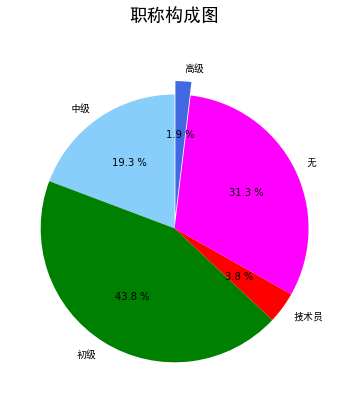

In [ ]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Fangsong']
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
chinese_font_path = FontProperties(fname = '/usr/share/fonts/truetype/arphic/uming.ttc')

plt.figure(figsize=(6,9))
labels=u'中级', u'初级', u'技术员', u'无',  u'高级'
colors = ['lightskyblue','green','red','magenta','royalblue']
# fracs = [1, 25, 27, 2,8]
fracs = [8, 1, 35, 7,12]
explode = [0, 0, 0, 0,0.1] # 0.1 凸出这部分，
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
#autopct ，show percet
patches,l_text,p_text=plt.pie(x=result, labels=labels, explode=explode,autopct='%3.1f %%',
        shadow=False, labeldistance=1.1, startangle = 90,pctdistance = 0.6,colors=colors,

        )
for t in l_text:
    t.set_fontproperties(matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/SimHei.ttf"))
zhfont = matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/SimHei.ttf")

plt.title(u"职称构成图",fontproperties=zhfont,y = 1.1,fontsize = 18)


#### 身份证号

In [ ]:
zjy_info['身份证号'] = zjy_info['身份证号'].str.strip()
zjy_info['身份证号-出生地区'] = zjy_info.身份证号.astype(str).str.slice(0,6)
zjy_info['身份证号-出生年份'] = zjy_info.身份证号.astype(str).str.slice(6,10)
zjy_info['身份证号-性别'] = zjy_info.身份证号.astype(str).str.slice(16,17)
zjy_info['身份证号-后四位'] = zjy_info.身份证号.astype(str).str.slice(14,18)

In [ ]:
#6个人名字/身份证后四位相同
zjy_info[zjy_info.duplicated(['姓名','身份证号-后四位'],False) == True][['姓名','身份证号-出生地区']]

,姓名,身份证号-出生地区
1514,高鹏,622801
2160,瞿丽娟,620103
2276,张娟,620123
2376,刘钰,622726
2377,郭应海,620503
3301,李鹏,622301
3784,曾玉梅,620321
3801,马小龙,620123
4111,刘静,620202
4319,陈秉赟,620103


In [ ]:
zjy_info['身份证号-地区码'] = zjy_info['身份证号-出生地区']
def getArea(s):
    area = {"11":"北京市", "12":"天津市", "13":"河北省", "14":"山西省", "15": "内蒙古自治区",
            "21":"辽宁省", "22":"吉林省", "23":"黑龙江省",
            "31":"上海市", "32":"江苏省", "33":"浙江省", "34":"安徽省", "35":"福建省", "36":"江西省", "37":"山东省",
            "41":"河南省", "42":"湖北省", "43":"湖南省", "44":"广东省", "45":"广西壮族自治区", "46":"海南省",
            "50":"重庆市", "51":"四川省", "52":"贵州省", "53":"云南省", "54":"西藏自治区",
            "61":"陕西省", "62":"甘肃省", "63":"青海省", "64":"宁夏回族自治区", "65":"新疆维吾尔自治区",
            "71":"台湾省",
            "81":"香港特别行政区", "82":"澳门特别行政区"}
    if s:
      if s[0:2] in area.keys():
        return(area[s[0:2]])
      else:
        return('地区码无效')
    else:
      return('地区码无效')

for i in range(0,13988):
  if zjy_info.iat[i,16] != None:
    zjy_info.iat[i,30] = getArea(str(zjy_info.iat[i,16]))
  else:
    zjy_info.iat[i,30] = '地区码无效'

In [ ]:
sheng = zjy_info['身份证号-地区码'].value_counts()
sheng

甘肃省         13270
陕西省           102
地区码无效          83
河南省            67
四川省            64
青海省            43
江苏省            40
新疆维吾尔自治区       34
湖北省            29
山西省            29
山东省            28
宁夏回族自治区        28
河北省            27
吉林省            18
湖南省            17
内蒙古自治区         17
黑龙江省           14
安徽省            12
辽宁省            11
江西省            10
浙江省             7
北京市             6
云南省             6
广东省             5
贵州省             5
重庆市             4
福建省             4
广西壮族自治区         3
上海市             2
天津市             2
海南省             1
Name: 身份证号-地区码, dtype: int64

Text(0.5, 1.1, '省市来源图')

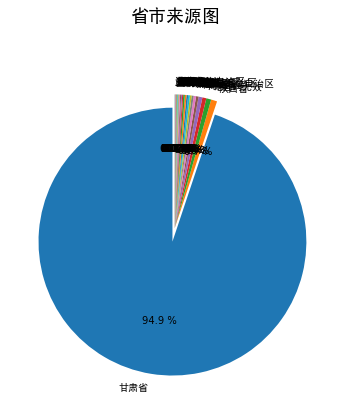

In [ ]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Fangsong']
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
chinese_font_path = FontProperties(fname = '/usr/share/fonts/truetype/arphic/uming.ttc')

plt.figure(figsize=(6,9))
labels = u'甘肃省', u'陕西省', u'地区码无效', u'河南省', u'四川省', u'青海省', u'江苏省', u'新疆维吾尔自治区', u'湖北省', u'山西省', u'山东省', u'宁夏回族自治区', u'河北省', u'吉林省', u'湖南省', u'内蒙古自治区', u'黑龙江省', u'安徽省', u'辽宁省', u'江西省', u'浙江省', u'北京市', u'云南省', u'广东省', u'贵州省', u'重庆市', u'福建省', u'广西壮族自治区', u'上海市', u'天津市', u'海南省'
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 0.1 凸出这部分，
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
#autopct ，show percet
patches,l_text,p_text=plt.pie(x=sheng, labels=labels, explode=explode,autopct='%3.1f %%',
        shadow=False, labeldistance=1.1, startangle = 90,pctdistance = 0.6

        )
for t in l_text:
    t.set_fontproperties(matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/SimHei.ttf"))
zhfont = matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/SimHei.ttf")

plt.title(u"省市来源图",fontproperties=zhfont,y = 1.1,fontsize = 18)

<BarContainer object of 60 artists>

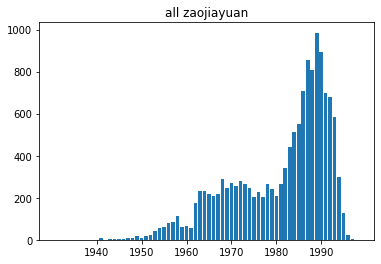

In [ ]:
year = zjy_info['身份证号-出生年份'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
year_count = year.to_list()
year_name = year.index.to_list()
year_name.remove('')
year_name1 = []
for x in year_name:
  year_name1.append(int(x))
YearTuple = zip(year_name1, year_count)
tempYearTuple = sorted(YearTuple, reverse=True)
yearName = [i[0] for i in tempYearTuple]
yearNum = [i[1] for i in tempYearTuple]
x_ticks_zjy = np.arange(1940, 2000, 10)
plt.xticks(x_ticks_zjy)
plt.title('all zaojiayuan')
plt.bar(yearName, yearNum)

In [ ]:
zjy_info['身份证号-性别'].value_counts()

2    4546
1    3929
4    1494
3    1443
6     695
5     612
7     410
8     313
9     257
0     210
       79
Name: 身份证号-性别, dtype: int64

In [ ]:
#既没有身份证号，又没有性别：
aaa = zjy_info[zjy_info[['性别']].isnull().T.any()]
aaa[aaa['身份证号-性别']==''] #27人，已在excel中修改

,序号,姓名,性别,新证书资格编号,资格证专业,第二专业,第三专业,执业资格,现执业单位,职称,...,毕业院校,所学专业,造价工作年限,考试通过年度,续期到期时间,身份证号-出生地区,身份证号-出生年份,身份证号-性别,身份证号-后四位,身份证号-地区码


##### 重复处理：

In [ ]:
#有两人数据 名字，身份证号，执业资格，资格证专业完全相同，怀疑重复录入 ：许桂峰/陈秉赟
zjy_info.drop_duplicates(subset =['姓名','身份证号','执业资格','资格证专业'], keep='first', inplace=True)

In [ ]:
dfchongfu1 = pd.DataFrame(zjy_info[zjy_info.duplicated(['姓名','身份证号'],False) == True][['姓名','身份证号','执业资格']].value_counts())
dfchongfu2 = pd.DataFrame(zjy_info[zjy_info.duplicated(['姓名','身份证号'],False) == True][['姓名','身份证号','资格证专业']].value_counts())

In [ ]:
# 同时有两个执业资格的人(14人)：
dfchongfu = dfchongfu1[dfchongfu1 == 2]   
name_Zhiyezige2 = dfchongfu[dfchongfu.isnull().T.any()].reset_index()[['姓名','身份证号']].drop_duplicates()['姓名'].values.tolist()
shenfenzhenghao_Zhiyezige2 = dfchongfu[dfchongfu.isnull().T.any()].reset_index()[['姓名','身份证号']].drop_duplicates()['身份证号'].values.tolist()
zjy_info['执业资格'].where(~zjy_info['身份证号'].isin(shenfenzhenghao_Zhiyezige2),'都有', inplace = True)
zjy_info.drop_duplicates(subset =['姓名','身份证号','执业资格'], keep='first', inplace=True)

In [ ]:
# 一个执业资格，两个专业（2人）：
shenfenzhenghao_Zhuanye2 = dfchongfu.dropna().reset_index()['身份证号'].values.tolist()
zjy_info['资格证专业'].where(~zjy_info['身份证号'].isin(shenfenzhenghao_Zhuanye2),'都有', inplace = True)
zjy_info.drop_duplicates(subset =['姓名','身份证号','资格证专业'], keep='first', inplace=True)

##### 可视化-省

In [ ]:
# 输入对照表
#https://docs.google.com/spreadsheets/d/1r7Gh8XV3NAxFrBc9znvxTQyx4v1CgkE8/edit?usp=sharing&ouid=117020772964111352188&rtpof=true&sd=true
id = "1r7Gh8XV3NAxFrBc9znvxTQyx4v1CgkE8"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('qianliuweiduizhao.xlsx')

In [ ]:
duizhao = pd.read_excel('qianliuweiduizhao.xlsx')
duizhao.head()

,编码,城市
0,110100,北京市市辖区
1,110101,北京市东城区
2,110102,北京市西城区
3,110103,北京市崇文区
4,110104,北京市宣武区


In [ ]:
zjy_info = zjy_info.where(zjy_info.notnull(), None)
city = dict(zip(duizhao['编码'] , duizhao['城市']))
def getCity(s):
    if s:
      if int(s[0:6]) in city.keys():
        return(city[int(s[0:6])])
      else:
        return('地区码无效')
    else:
      return('地区码无效')

for i in range(0,13970):
  if zjy_info.iat[i,16] != None:
    zjy_info.iat[i,26] = getCity(str(zjy_info.iat[i,16]))
  else:
    zjy_info.iat[i,26] = '地区码无效'

In [ ]:
zjy_info['身份证号-出生地区'].value_counts()

地区码无效         5444
甘肃省兰州市城关区     1385
甘肃省兰州市七里河区     958
甘肃省兰州市西固区      605
甘肃省兰州市榆中县      416
              ... 
辽宁省北宁市           1
四川省荣县            1
河南省汝州市           1
山东省鱼台县           1
河南省涧西区           1
Name: 身份证号-出生地区, Length: 336, dtype: int64

In [ ]:
province_dict = {'北京': 6, '河北': 27, '辽宁': 11, '江西': 10, '上海': 2, '安徽': 12, '江苏': 40, '湖南': 17,
                 '浙江': 7, '海南': 1, '广东': 5, '湖北': 29, '黑龙江': 14, '陕西': 102, '四川': 64,
                 '内蒙古': 17, '重庆': 4, '云南': 6, '贵州': 5, '吉林': 18, '山西': 29, '山东': 28, '福建': 4, '青海': 43,
                 '天津': 1, '甘肃': 13270, '河南': 67,'新疆': 34,'宁夏': 28, '广西': 3,'天津': 2}

province_char = [[item[0],item[1]] for item in province_dict.items()]
print(province_char)

map = Map(init_opts=opts.InitOpts(width='1200px', height='800px'))
map.set_global_opts(
    title_opts=opts.TitleOpts(title="造价员信息"),
    visualmap_opts=opts.VisualMapOpts(max_=50))
map.add("China Map Example", data_pair=province_char, maptype='china', is_roam=True)
map.render(path="造价员的全国分布3.html")

[['北京', 6], ['河北', 27], ['辽宁', 11], ['江西', 10], ['上海', 2], ['安徽', 12], ['江苏', 40], ['湖南', 17], ['浙江', 7], ['海南', 1], ['广东', 5], ['湖北', 29], ['黑龙江', 14], ['陕西', 102], ['四川', 64], ['内蒙古', 17], ['重庆', 4], ['云南', 6], ['贵州', 5], ['吉林', 18], ['山西', 29], ['山东', 28], ['福建', 4], ['青海', 43], ['天津', 2], ['甘肃', 13270], ['河南', 67], ['新疆', 34], ['宁夏', 28], ['广西', 3]]


'/content/造价员的全国分布3.html'

#### 经纬度可视化

##### 可视化准备：

地址空值处理：

In [ ]:
# 没有地址的用单位地址填补空值：
zjy_info['地址'] = np.where(zjy_info['地址'].isnull(), zjy_info['现执业单位'], zjy_info['地址'])

In [ ]:
#install packages for map
!pip install echarts-countries-pypkg
!pip install pyecharts
from pyecharts.charts import Map,Geo
from pyecharts import options as opts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.3 MB/s 
  Using cached pyecharts_jupyter_installer-0.0.3-py2.py3-none-any.whl (4.7 kB)
  Created wheel for echarts-countries-pypkg: filename=echarts_countries_pypkg-0.1.6-py3-none-any.whl size=2118069 sha256=442ca139df738fb4c9b72aac5cf6daa10ce047ab368f12674fd51abff8fe7fb8
  Stored in directory: /root/.cache/pip/wheels/f2/37/b2/d78ef6e8e5a04e385af103d9d39b117d72a0f42945124fc51a
Successfully built echarts-countries-pypkg
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 7.2 MB/s 
     |████████████████████████████████| 130 kB 53.3 MB/s 


In [ ]:
# 导入相关的包
import requests as se #HTTP请求
import time 
import re
import json # 用于解析Json

In [ ]:
'''
def calc_ll(x):
    if not x:
      return ' '
    Post_url = "http://api.map.baidu.com/geocoding/v3/?address=" + x + "&output=json&ak=43HKXQKSmz7avFR3FzUir0YVsiD1vApm&callback=showLocation"
    Post_data = {
        'address': x
    }
    Text = se.post(Post_url, data=Post_data).text.replace("'", '"').replace('/ ', '/')#[27:-1] # 提取为Json格式，去掉‘showLocation&&showLocation()’这些额外的字符
    jsonValue = json.loads(Text) # 转化为Json对象
    # print(jsonValue) # 打印Json值
    if('result' in jsonValue):
        print(jsonValue['result']['location']['lng'])
        return [jsonValue['result']['location']['lng'],jsonValue['result']['location']['lat']]
    else:
        return ' '
        
# 通过这行的代码去调用的获取经纬度的 API 接口
address = zjy_info['地址'].apply(calc_ll) # 这里的address是可以直接导入pandas的，详细的可以查看apply的返回值
se = requests.session()
'''

In [ ]:
zjy_info['ip'].iloc[15]

'二十一冶兰州市定西路211号'

In [ ]:
zjy_info['ip'] = zjy_info['地址']

In [ ]:
zjy_info.iat[13969,31]

'甘肃省兰州市508信箱11分箱'

In [ ]:
for i in range(10000,13970):
  if zjy_info['地址'].iloc[i] == None:
    zjy_info.iat[i,31] = ''
  else:
    Post_url = "http://api.map.baidu.com/geocoding/v3/?address=" + zjy_info['地址'].iloc[i] + "&output=json&ak=43HKXQKSmz7avFR3FzUir0YVsiD1vApm&callback=showLocation"
    Post_data = {'address': zjy_info['地址'].iloc[i]}
    Text = se.post(Post_url, data=Post_data).text.replace("'", '"').replace('/ ', '/')
    zjy_info.iat[i,31] = Text[60:110]

In [ ]:
# ce Error:无相关结果","results":[]})
zjy_info['ip'][10000:13970]

10003    {"lng":103.87283567095506,"lat":36.06983728958...
10004    {"lng":103.8233366119304,"lat":36.068241783946...
10005    {"lng":103.81159108772633,"lat":36.06558610924...
10006    {"lng":103.95537710155324,"lat":36.32897166416...
10007    {"lng":103.84239694807165,"lat":36.04951789937...
                               ...                        
13983    {"lng":103.7268789018633,"lat":36.111780455078...
13984    {"lng":103.71384880077997,"lat":36.10290691921...
13985    {"lng":103.36602203273887,"lat":34.68858335963...
13986    {"lng":103.84052119633629,"lat":36.06723469354...
13987    {"lng":103.84052119633629,"lat":36.06723469354...
Name: ip, Length: 3970, dtype: object

##### 用新数据分析

In [ ]:
#https://docs.google.com/spreadsheets/d/1Dgvvc-6aXQ4JROWkz3xKbV-QUXN9wvO1/edit?usp=sharing&ouid=117020772964111352188&rtpof=true&sd=true
id = "1Dgvvc-6aXQ4JROWkz3xKbV-QUXN9wvO1"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('zjy2.xlsx')
zjy_info_geo = pd.read_excel('zjy2.xlsx')
zjy_info_geo.head()

,Unnamed: 0,姓名,性别,新证书资格编号,资格证专业,第二专业,第三专业,执业资格,现执业单位,职称,...,考试通过年度,续期到期时间,身份证号-出生地区,身份证号-出生年份,身份证号-性别,身份证号-后四位,身份证号-地区码,lng,lat,count
0,0,赵贵云,男,甘050000001,安装工程,NaN,NaN,全国造价员,甘肃省建设工程造价管理总站,无,...,NaN,42735,地区码无效,NaN,NaN,NaN,地区码无效,103.838171,36.063326,1
1,1,任建彪,男,甘050000002,建筑工程,NaN,NaN,全国造价员,甘肃省建设工程造价管理总站,无,...,NaN,42735,地区码无效,NaN,NaN,NaN,地区码无效,103.838171,36.063326,1
2,2,马永林,男,甘050000003,建筑工程,NaN,NaN,全国造价员,甘肃省建设工程造价管理总站,无,...,NaN,42735,地区码无效,NaN,NaN,NaN,地区码无效,103.838171,36.063326,1
3,3,冯建平,男,甘050000004,安装工程,NaN,NaN,全国造价员,甘肃省建设工程造价管理总站,无,...,NaN,42735,地区码无效,NaN,NaN,NaN,地区码无效,103.838171,36.063326,1
4,4,顾正平,男,甘050000006,建筑工程,NaN,NaN,全国造价员,甘肃省建设工程造价管理总站,无,...,NaN,42735,地区码无效,NaN,NaN,NaN,地区码无效,103.838171,36.063326,1


In [ ]:
zjy_info_geo['lat'] = pd.to_numeric(zjy_info_geo['lat'])
zjy_info_geo['lng'] = pd.to_numeric(zjy_info_geo['lng'])

In [ ]:
#!pip install plotly==5.8.0
import plotly.express as px
fig = px.density_mapbox(zjy_info_geo, lat='lat', lon='lng',mapbox_style="stamen-terrain")
fig

#### 存档单位

In [ ]:
zjy_info['存档单位'].value_counts()

NameError: ignored

#### 考试通过年度

In [ ]:
zjy_info['考试通过年度'].value_counts()

2011          3064
2015          2158
2014.12       1889
2012          1133
2009          1042
              ... 
2012.4.28        1
2011.10.25       1
2012.12.26       1
2014.07.01       1
2015.12.19       1
Name: 考试通过年度, Length: 116, dtype: int64

In [ ]:
zjy_info['考试通过年度'] = zjy_info['考试通过年度'].str.strip()
zjy_info['考试通过年度'] = zjy_info.考试通过年度.astype(str).str.slice(0,4)

<BarContainer object of 32 artists>

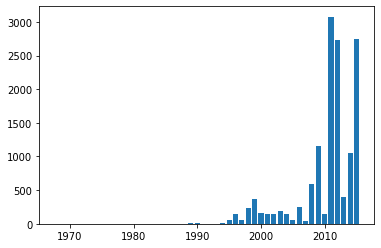

In [ ]:
passyear = zjy_info['考试通过年度'].value_counts()
passyear_count = passyear.to_list()
passyear_name = passyear.index.to_list()
passyear_name.remove('201.')
passyear_name.remove('nan')
passyear_name.remove('未见原件')
passyear_name.remove('None')
passyear_name1 = []
for x in passyear_name:
  passyear_name1.append(int(x))
passyearTuple = zip(passyear_name1, passyear_count)
temppassyearTuple = sorted(passyearTuple, reverse=True)
passyearName = [i[0] for i in temppassyearTuple]
passyearNum = [i[1] for i in temppassyearTuple]
plt.bar(passyearName, passyearNum)

#### 所学专业

In [ ]:
zjy_info['所学专业'].value_counts()[315:500]

有机工艺           2
草业科学           2
地质工程           2
林业生态环境工程与管理    2
给水与排水工程        2
              ..
电力             1
计算机应用与维护       1
人口资源环境与经济学     1
电子与电气技术应用      1
现代园艺专业         1
Name: 所学专业, Length: 185, dtype: int64

#### 资格证专业

In [ ]:
zjy_info['资格证专业'].value_counts()

建筑工程    11810
安装工程     2082
市政工程       75
都有          2
Name: 资格证专业, dtype: int64

In [ ]:
zjy_info[zjy_info['资格证专业']=='市政工程']['现执业单位'][55:70]

11393           甘肃中盛道桥工程有限责任公司
11394             兰州西部投资咨询有限公司
11395         甘肃澳华建筑规划设计有限责任公司
11396           兰州市政建设集团有限责任公司
11397           兰州市政建设集团有限责任公司
11398           兰州市政建设集团有限责任公司
11399           兰州市政建设集团有限责任公司
11400    江苏希地环球建设项目管理有限公司甘肃分公司
11401           兰州市政建设集团有限责任公司
11402           兰州市政建设集团有限责任公司
11403               兰州市政施工有限公司
11404               兰州市政施工有限公司
11405               兰州市政施工有限公司
11469               嘉峪关市市政工程公司
11566              会宁县第三建筑有限公司
Name: 现执业单位, dtype: object

#### 执业资格

In [ ]:
zjy_info['执业资格'] = zjy_info['执业资格'].str.strip()
zjy_info['执业资格'].replace('造价员','全国造价员', inplace = True)

In [ ]:
zjy_info['执业资格'] .value_counts()

全国造价员     11021
甘肃省造价师     2935
都有           14
Name: 执业资格, dtype: int64

#### 民族

In [ ]:
zjy_info['民族'].replace(['汉','汉蔟'],'汉族', inplace = True)
zjy_info['民族'].replace('藏','藏族', inplace = True)

In [ ]:
zjy_info['民族'].value_counts()

汉族      4944
回族        69
满族        19
藏族         8
土族         4
蒙古族        3
壮族         2
裕固族        2
东乡族        2
彝族         1
白族         1
土家族        1
哈萨克族       1
朝鲜族        1
Name: 民族, dtype: int64

#### 性别

In [ ]:
zjy_info['性别'] = zjy_info['性别'].str.strip()

In [ ]:
zjy_info['性别'].value_counts()

女    6359
男    5775
Name: 性别, dtype: int64

#### 所在地

In [ ]:
zjy_info['所在地'] = zjy_info['所在地'].str.strip()
zjy_info['所在地'].replace('兰州','兰州市', inplace = True)
zjy_info['所在地'].replace('天水','天水市', inplace = True)
zjy_info['所在地'].replace('酒泉','酒泉市', inplace = True)
zjy_info['所在地'].replace('庆阳','庆阳市', inplace = True)
zjy_info['所在地'].replace('金昌','金昌市', inplace = True)
zjy_info['所在地'].replace('白银','白银市', inplace = True)
zjy_info['所在地'].replace('张掖','张掖市', inplace = True)
zjy_info['所在地'].replace('定西','定西市', inplace = True)
zjy_info['所在地'].replace('平凉','平凉市', inplace = True)
zjy_info['所在地'].replace('临夏','临夏回族自治州', inplace = True)
zjy_info['所在地'].replace('武威','武威市', inplace = True)
zjy_info['所在地'].replace('陇南','陇南市', inplace = True)
zjy_info['所在地'].replace('嘉峪关','嘉峪关市', inplace = True)
zjy_info['所在地'].replace('甘南','甘南藏族自治州', inplace = True)
zjy_info['所在地'].replace('甘矿','甘肃矿区', inplace = True)

In [ ]:
zjy_info['所在地'] .value_counts()

省属         4839
兰州市        1998
甘肃省         994
酒泉市         594
庆阳市         566
天水市         552
金昌市         544
白银市         472
平凉市         436
张掖市         429
定西市         366
临夏回族自治州     293
武威市         249
嘉峪关市        221
陇南市         215
甘南藏族自治州     101
甘肃矿区         81
Name: 所在地, dtype: int64

#### 学历

In [ ]:
zjy_info[zjy_info['学历']=='中']

,序号,姓名,性别,新证书资格编号,资格证专业,第二专业,第三专业,执业资格,现执业单位,职称,...,毕业院校,所学专业,造价工作年限,考试通过年度,续期到期时间,身份证号-出生地区,身份证号-出生年份,身份证号-性别,身份证号-后四位,身份证号-地区码
6786,6788.0,任珈琪,女,甘140000950,建筑工程,None,None,全国造价员,甘肃正鑫项目管理有限公司,无,...,兰州城建学校,工程造价,None,nan,42735.0,620102,1993,2,4622,甘肃省
6903,6905.0,王艳红,女,甘140001068,建筑工程,None,None,全国造价员,甘肃维信工程造价咨询有限责任公司,初级,...,兰州城市建设学校,工民建,None,nan,42735.0,620422,1985,2,4821,甘肃省
6932,6934.0,吴迎霞,女,甘140001097,建筑工程,None,None,全国造价员,鸣森项目管理咨询有限公司,无,...,甘肃省理工中等专业学校,工民建,None,nan,42735.0,622727,1990,2,0426,甘肃省
6987,6989.0,杨言弟,女,甘140001152,建筑工程,None,None,全国造价员,甘肃第二建设集团有限责任公司,无,...,兰州城市建设学校,工民建,None,nan,42735.0,620122,1982,2,0224,甘肃省
7000,7002.0,姚振海,男,甘140001165,建筑工程,None,None,全国造价员,兰州福泰昊建筑有限公司,初级,...,兰州城市建设学校,工民建,None,nan,42735.0,620103,1984,1,3017,甘肃省
7006,7008.0,尹梅兰,女,甘140001171,安装工程,None,None,全国造价员,兰州东方明珠系统工程有限公司,无,...,甘肃省建筑工程学校,水暖及通风,None,nan,42735.0,632122,1970,2,0025,青海省
7095,7097.0,赵亚江,男,甘140001261,安装工程,None,None,全国造价员,甘肃一安建设科技集团有限公司,中级,...,甘肃省建筑工程学校,暖通,None,nan,42735.0,620104,1975,1,0814,甘肃省
7142,7144.0,董亚坤,女,甘140A00096,安装工程,None,None,全国造价员,中石油第二建设公司,无,...,兰州电力学校,计算机引用,None,nan,42735.0,620104,1983,2,1127,甘肃省
7382,7384.0,张雪娥,女,甘140A00340,安装工程,None,None,全国造价员,兰州万桥智能科技有限责任公司,无,...,甘肃省理工中等专业学校,工民建,None,nan,42735.0,622425,1991,2,4425,甘肃省
7454,7456.0,汉晋德,男,甘140C00055,安装工程,None,None,全国造价员,八冶建设集团有限公司,中级,...,吉林电气化高等专科学校,自动化仪表,None,nan,42735.0,620123,1973,3,2737,甘肃省


In [ ]:
zjy_info['学历'] = zjy_info['学历'].str.strip()
zjy_info['学历'].replace('中','中专', inplace = True)
zjy_info['学历'].replace('专科','大专', inplace = True)
zjy_info['学历'].replace('研究生','硕士', inplace = True)

In [ ]:
zjy_info['学历'] .value_counts()

大专    7766
中专    1908
本科    1586
高中     287
初中      64
硕士      24
职高      12
技校       8
Name: 学历, dtype: int64

#### 第二专业/第三专业

In [ ]:
zjy_info['第二专业'].value_counts()

安装工程                         154
建筑工程                          17
安装工程                           4
本人自愿注销资造价员格                    4
 安装工程                          2
已考全国注册造价师                      2
原名王国泰更名为王国（太）2014.3.26         1
 已考全国注册造价师                     1
安装工程                           1
原名：刘正巍                         1
2019年考取注册造价师                   1
                               1
2015考安装甘150001058              1
原名：刘保凤现更名为：刘保风                 1
2012年建筑工程                      1
赵华更名为：赵聆彤                      1
安装工程                           1
Name: 第二专业, dtype: int64

### 2020报考信息

In [ ]:
#导入2020年报名人员的数据：
#https://docs.google.com/spreadsheets/d/1rzqPP_jw1aPW13_nuaCSyUhkWaBqf6Wo/edit?usp=sharing&ouid=117020772964111352188&rtpof=true&sd=true
id = "1rzqPP_jw1aPW13_nuaCSyUhkWaBqf6Wo"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('2020_zjz.xlsx')
zjz_2020 = pd.read_excel('2020_zjz.xlsx')
zjz_2020.head()

,姓名,身份证号,工作单位,个人学历,级别代码,级别名称,专业代码,专业名称
0,汪如彬,622224199301050512,张掖市隆泰建筑工程有限责任公司,中等专科毕业,2,考全科,1,土木建筑
1,马秀娟,622722199309280229,甘肃众联消防工程有限公司,大学本科,1,免一科,2,安装工程
2,王素贞,620102198211174343,甘肃第三建设集团有限公司,大学本科,1,免一科,1,土木建筑
3,王宇欣,620421199301025157,兰州鸿森置业发展有限公司,专科教育,2,考全科,1,土木建筑
4,李振琪,620422199011242715,甘肃省安装建设集团有限公司,专科教育,1,免一科,1,土木建筑


In [ ]:
#数据清洗（空格）：
zjz_2020['姓名'] = zjz_2020['姓名'].str.strip()
zjz_2020['身份证号'] = zjz_2020['身份证号'].str.strip()
zjz_2020['身份证号-后四位'] = zjz_2020.身份证号.astype(str).str.slice(14,18)
zjz_2020['身份证号-出生地区'] = zjz_2020.身份证号.astype(str).str.slice(0,6)
zjz_2020['身份证号-出生年份'] = zjz_2020.身份证号.astype(str).str.slice(6,10)

In [ ]:
zjz_2020['身份证号-出生地区'].value_counts()

620102    754
622301    695
620422    635
620103    626
620421    575
         ... 
142622      1
370223      1
411022      1
341224      1
511002      1
Name: 身份证号-出生地区, Length: 548, dtype: int64

In [ ]:
zjz_2020.nunique()

姓名           13978
身份证号         15609
工作单位          5678
个人学历            11
级别代码             2
级别名称             2
专业代码             2
专业名称             2
身份证号-后四位      4853
身份证号-出生地区      548
身份证号-出生年份       46
dtype: int64

<BarContainer object of 46 artists>

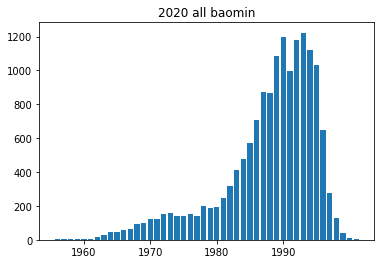

In [ ]:
year_2020 = zjz_2020['身份证号-出生年份'] .value_counts()
# 2020报名的所有人出生年份：
year_count_2020 = year_2020.to_list()
year_name_2020 = year_2020.index.to_list()
#year_name_2020.remove('')
year_name1_2020 = []
for x in year_name_2020:
  year_name1_2020.append(int(x))
YearTuple_2020 = zip(year_name1_2020, year_count_2020)
tempYearTuple_2020 = sorted(YearTuple_2020, reverse=True)
yearName_2020 = [i[0] for i in tempYearTuple_2020]
yearNum_2020 = [i[1] for i in tempYearTuple_2020]
x_ticks_2020 = np.arange(1940, 2000, 10)
plt.xticks(x_ticks_2020)
plt.title('2020 all baomin')
plt.bar(yearName_2020, yearNum_2020)

In [ ]:
zjz_2020['专业名称'].value_counts()

土木建筑    13283
安装工程     2326
Name: 专业名称, dtype: int64

#### 经纬度可视化准备

In [ ]:
zjz_2020.iat[15608,11]

'{"lng":103.5302424308151,"lat":37.583373663051087}'

In [ ]:
zjz_2020['ip'] = zjz_2020['工作单位']

In [ ]:
for i in range(10000,15609):
  if zjz_2020['工作单位'].iloc[i] == None:
    zjz_2020.iat[i,11] = ''
  else:
    Post_url = "http://api.map.baidu.com/geocoding/v3/?address=" + zjz_2020['工作单位'].iloc[i] + "&output=json&ak=43HKXQKSmz7avFR3FzUir0YVsiD1vApm&callback=showLocation"
    Post_data = {'address': zjz_2020['工作单位'].iloc[i]}
    Text = se.post(Post_url, data=Post_data).text.replace("'", '"').replace('/ ', '/')
    zjz_2020.iat[i,11] = Text[60:110]

In [ ]:
from google.colab import files
zjz_2020.to_excel('zjz2_2020.xlsx')

In [ ]:
zjz_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15609 entries, 0 to 15608
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   姓名         15609 non-null  object
 1   身份证号       15609 non-null  object
 2   工作单位       15609 non-null  object
 3   个人学历       15609 non-null  object
 4   级别代码       15609 non-null  int64 
 5   级别名称       15609 non-null  object
 6   专业代码       15609 non-null  int64 
 7   专业名称       15609 non-null  object
 8   身份证号-后四位   15609 non-null  object
 9   身份证号-出生地区  15609 non-null  object
 10  身份证号-出生年份  15609 non-null  object
 11  ip         15609 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.4+ MB


#### 经纬度可视化

In [ ]:
#https://docs.google.com/spreadsheets/d/1o7VrwvuViNF3RlIO0EmxSugz5zREHID7/edit?usp=sharing&ouid=117020772964111352188&rtpof=true&sd=true
id = "1o7VrwvuViNF3RlIO0EmxSugz5zREHID7"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('zjz2_2020.xlsx')
zjz_2020_geo = pd.read_excel('zjz2_2020.xlsx')
zjz_2020_geo.head()

,Unnamed: 0,姓名,身份证号,工作单位,个人学历,级别代码,级别名称,专业代码,专业名称,身份证号-后四位,身份证号-出生地区,身份证号-出生年份,lng,lat
0,0.0,汪如彬,622224199301050512,张掖市隆泰建筑工程有限责任公司,中等专科毕业,2.0,考全科,1.0,土木建筑,0512,622224,1993,100.456411,38.932066
1,1.0,马秀娟,622722199309280229,甘肃众联消防工程有限公司,大学本科,1.0,免一科,2.0,安装工程,0229,622722,1993,103.842002,36.060175
2,2.0,王素贞,620102198211174343,甘肃第三建设集团有限公司,大学本科,1.0,免一科,1.0,土木建筑,4343,620102,1982,103.842002,36.060175
3,3.0,王宇欣,620421199301025157,兰州鸿森置业发展有限公司,专科教育,2.0,考全科,1.0,土木建筑,5157,620421,1993,103.840521,36.067235
4,4.0,李振琪,620422199011242715,甘肃省安装建设集团有限公司,专科教育,1.0,免一科,1.0,土木建筑,2715,620422,1990,125.326808,43.828197


In [ ]:
zjz_2020_geo['lat'] = pd.to_numeric(zjz_2020_geo['lat'])
zjz_2020_geo['lng'] = pd.to_numeric(zjz_2020_geo['lng'])

In [ ]:
import plotly.express as px
fig = px.density_mapbox(zjz_2020_geo, lat='lat', lon='lng',mapbox_style="stamen-terrain")
fig

In [ ]:
zjz_2020_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15609 entries, 0 to 15608
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15609 non-null  int64  
 1   姓名          15609 non-null  object 
 2   身份证号        15609 non-null  object 
 3   工作单位        15609 non-null  object 
 4   个人学历        15609 non-null  object 
 5   级别代码        15609 non-null  int64  
 6   级别名称        15609 non-null  object 
 7   专业代码        15609 non-null  int64  
 8   专业名称        15609 non-null  object 
 9   身份证号-后四位    15609 non-null  object 
 10  身份证号-出生地区   15609 non-null  int64  
 11  身份证号-出生年份   15609 non-null  int64  
 12  lng         15547 non-null  float64
 13  lat         15547 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.7+ MB


#### 和造价员交集

*2020年有5139名已经是造价员的人报名了二级造价师考试*:

In [ ]:
# 求交集
intersected_df_2020 = pd.merge(zjz_2020, zjy_info, on=['姓名','身份证号'],suffixes=('','_right'))
intersected_df_2020 = intersected_df_2020[['姓名', '性别', '新证书资格编号', '资格证专业', '第二专业', '第三专业', '执业资格', '现执业单位','职称', '存档单位', '初始注册单位', '手机', '办公室', '地址', '邮政编码', '身份证号', '所在地', '民族','学历', '毕业时间', '毕业院校', '所学专业', '造价工作年限', '考试通过年度', '续期到期时间', '身份证号-出生地区','身份证号-出生年份', '身份证号-性别', '身份证号-后四位', '身份证号-地区码']]

In [ ]:
# 2020交集的出生地区：
intersected_df_2020['身份证号-出生地区'].value_counts()[0:15]

620102    392
620103    345
622102    192
620123    177
622301    159
620421    158
620422    144
620121    141
620502    137
622727    135
620503    131
620522    128
622201    128
620104    127
620402    124
Name: 身份证号-出生地区, dtype: int64

In [ ]:
# 2020交集的执业资格：
intersected_df_2020['执业资格'] .value_counts()

全国造价员     3692
甘肃省造价师    1440
都有           7
Name: 执业资格, dtype: int64

In [ ]:
# 2020交集的资格证专业：
intersected_df_2020['资格证专业'].value_counts()

建筑工程    4423
安装工程     698
市政工程      17
Name: 资格证专业, dtype: int64

<BarContainer object of 41 artists>

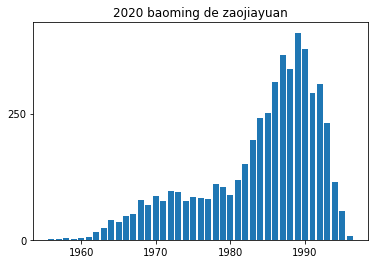

In [ ]:
year_2020_jiaoji = intersected_df_2020['身份证号-出生年份'] .value_counts()
# 2020交集的出生年份：
year_count_2020_jiaoji = year_2020_jiaoji.to_list()
year_name_2020_jiaoji = year_2020_jiaoji.index.to_list()
#year_name_2020.remove('')
year_name1_2020_jiaoji = []
for x in year_name_2020_jiaoji:
  year_name1_2020_jiaoji.append(int(x))
YearTuple_2020_jiaoji = zip(year_name1_2020_jiaoji, year_count_2020_jiaoji)
tempYearTuple_2020_jiaoji = sorted(YearTuple_2020_jiaoji, reverse=True)
yearName_2020_jiaoji = [i[0] for i in tempYearTuple_2020_jiaoji]
yearNum_2020_jiaoji = [i[1] for i in tempYearTuple_2020_jiaoji]
x_ticks_2020_jiaoji = np.arange(1940, 2000, 10)
plt.xticks(x_ticks_2020_jiaoji)
plt.yticks(np.arange(0, 1500, 250))
plt.title('2020 baoming de zaojiayuan')
plt.bar(yearName_2020_jiaoji, yearNum_2020_jiaoji)


#### 和造价员差集

In [ ]:
# 8831名造价员未报名2020年考试
set_diff_2020 = zjy_info.append(intersected_df_2020)
set_diff_2020.drop_duplicates(subset=['姓名','身份证号'],keep=False)

,序号,姓名,性别,新证书资格编号,资格证专业,第二专业,第三专业,执业资格,现执业单位,职称,...,毕业院校,所学专业,造价工作年限,考试通过年度,续期到期时间,身份证号-出生地区,身份证号-出生年份,身份证号-性别,身份证号-后四位,身份证号-地区码
0,1.0,赵贵云,男,甘050000001,安装工程,None,None,全国造价员,甘肃省建设工程造价管理总站,无,...,None,None,None,None,42735.0,None,,,,地区码无效
1,2.0,任建彪,男,甘050000002,建筑工程,None,None,全国造价员,甘肃省建设工程造价管理总站,无,...,None,None,None,None,42735.0,None,,,,地区码无效
2,3.0,马永林,男,甘050000003,建筑工程,None,None,全国造价员,甘肃省建设工程造价管理总站,无,...,None,None,None,None,42735.0,None,,,,地区码无效
3,4.0,冯建平,男,甘050000004,安装工程,None,None,全国造价员,甘肃省建设工程造价管理总站,无,...,None,None,None,None,42735.0,None,,,,地区码无效
4,5.0,顾正平,男,甘050000006,建筑工程,None,None,全国造价员,甘肃省建设工程造价管理总站,无,...,None,None,None,None,42735.0,None,,,,地区码无效
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979,13981.0,李琴,女,甘150N00033,建筑工程,None,None,甘肃省造价师,甘肃嘉盛路桥工程有限公司,无,...,甘肃建筑职业技术学院,工程造价,1.0,2015,43100.0,620503,1993,2,8024,甘肃省
13982,13984.0,马活全,男,甘150N00036,建筑工程,None,None,甘肃省造价师,临夏市城关建筑工程公司,无,...,西北师大,乡镇企业管理,9.0,2015,43100.0,622901,1972,1,0016,甘肃省
13983,13985.0,王医平,女,甘150N00037,建筑工程,None,None,甘肃省造价师,临夏市第二建筑工程公司,中级,...,西北师范大学,会计电算化,5.0,2015,43100.0,620105,1980,4,1041,甘肃省
13986,13988.0,袁文志,男,甘150Q00004,安装工程,None,None,甘肃省造价师,甘肃矿区中核华宇建筑工程有限公司,无,...,东北财经大学,工程管理,10.0,2015,43100.0,510603,1982,3,6336,四川省


In [ ]:
set_diff_2020['身份证号-出生年份'].value_counts()

1989    1393
1990    1269
1987    1218
1988    1144
1986    1020
        ... 
1943       1
1939       1
1940       1
1998       1
1931       1
Name: 身份证号-出生年份, Length: 61, dtype: int64

<BarContainer object of 46 artists>

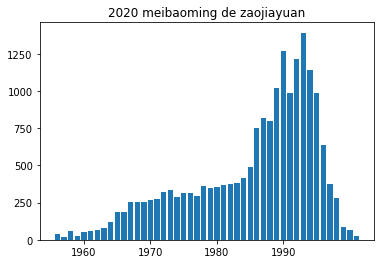

In [ ]:
year_2020_chaji = set_diff_2020['身份证号-出生年份'].value_counts()
# 2020差集的出生年份：
year_count_2020_chaji = year_2020_chaji.to_list()
year_name_2020_chaji = year_2020_chaji.index.to_list()
#year_name_2020.remove('')
year_name1_2020_chaji = []
for x in year_name_2020:
  year_name1_2020_chaji.append(int(x))
YearTuple_2020_chaji = zip(year_name1_2020_chaji, year_count_2020_chaji)
tempYearTuple_2020_chaji = sorted(YearTuple_2020_chaji, reverse=True)
yearName_2020_chaji = [i[0] for i in tempYearTuple_2020_chaji]
yearNum_2020_chaji = [i[1] for i in tempYearTuple_2020_chaji]
x_ticks_2020_chaji = np.arange(1940, 2000, 10)
plt.xticks(x_ticks_2020_chaji)
plt.yticks(np.arange(0, 1500, 250))
plt.title('2020 meibaoming de zaojiayuan')
plt.bar(yearName_2020_chaji, yearNum_2020_chaji)

### 2021报考信息

In [ ]:
#导入2021年报名人员的数据：
#https://docs.google.com/spreadsheets/d/1qiLfp33qt6gghd6nKRYmdqVSltTrGfJ1/edit?usp=sharing&ouid=117020772964111352188&rtpof=true&sd=true
id = "1qiLfp33qt6gghd6nKRYmdqVSltTrGfJ1"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('2021_zjz.xlsx')
zjz_2021 = pd.read_excel('2021_zjz.xlsx')
zjz_2021.head()

,姓名,身份证号,工作单位,个人学历,级别代码,级别名称,专业代码,专业名称
0,县乔,620502********2948,天水鸿顺达电力工程有限公司,专科教育,2,考全科,2,安装工程
1,张蕾,620103********0026,甘肃中南立德工程咨询有限公司,大学本科,2,考全科,1,土木建筑
2,保杰,622201********4856,张掖市机电安装公司,专科教育,1,免一科,2,安装工程
3,王旋,622424********0095,甘肃昊源工贸有限责任公司,专科教育,2,考全科,1,土木建筑
4,白麒钰,622627********241X,甘肃银基建设工程有限公司,专科教育,2,考全科,1,土木建筑


In [ ]:
zjz_2021['身份证号'] = zjz_2021['身份证号'].str.strip()
zjz_2021['身份证号-后四位'] = zjz_2021.身份证号.astype(str).str.slice(14,18)
zjz_2021['身份证号-出生地区'] = zjz_2021.身份证号.astype(str).str.slice(0,6)

In [ ]:
zjz_2021['专业名称'].value_counts()

土木建筑    9556
安装工程    2268
Name: 专业名称, dtype: int64

In [ ]:
#身份证号后四位和名字都一样，0人
zjz_2021[zjz_2021.duplicated(['姓名','身份证号-后四位','身份证号-出生地区'],False) == True]

,姓名,身份证号,工作单位,个人学历,级别代码,级别名称,专业代码,专业名称,身份证号-后四位,身份证号-出生地区


##### 和造价员交集

In [ ]:
#1722名造价员报名2021年二级考试
intersected_df_2021 = pd.merge(zjz_2021, zjy_info, on=['姓名','身份证号-后四位'],suffixes=('_light',''))
intersected_df_2021 = intersected_df_2021[['姓名', '性别', '新证书资格编号', '资格证专业', '第二专业', '第三专业', '执业资格', '现执业单位','职称', '存档单位', '初始注册单位', '手机', '办公室', '地址', '邮政编码', '身份证号', '所在地', '民族','学历', '毕业时间', '毕业院校', '所学专业', '造价工作年限', '考试通过年度', '续期到期时间', '身份证号-出生地区','身份证号-出生年份', '身份证号-性别', '身份证号-后四位', '身份证号-地区码']]
intersected_df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1723 entries, 0 to 1722
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   姓名         1723 non-null   object 
 1   性别         1580 non-null   object 
 2   新证书资格编号    1723 non-null   object 
 3   资格证专业      1722 non-null   object 
 4   第二专业       27 non-null     object 
 5   第三专业       19 non-null     object 
 6   执业资格       1723 non-null   object 
 7   现执业单位      1592 non-null   object 
 8   职称         1723 non-null   object 
 9   存档单位       180 non-null    object 
 10  初始注册单位     421 non-null    object 
 11  手机         1721 non-null   object 
 12  办公室        924 non-null    object 
 13  地址         1359 non-null   object 
 14  邮政编码       1004 non-null   float64
 15  身份证号       1723 non-null   object 
 16  所在地        1556 non-null   object 
 17  民族         563 non-null    object 
 18  学历         1320 non-null   object 
 19  毕业时间       1718 non-null   object 
 20  毕业院校    

In [ ]:
# 2021交集的出生地区：
intersected_df_2021['身份证号-出生地区'].value_counts()[0:15]

620103    97
620102    97
622727    71
622102    66
620104    61
620422    60
620123    58
622301    53
620121    49
620421    48
620522    46
620502    38
620402    37
620503    36
622801    35
Name: 身份证号-出生地区, dtype: int64

In [ ]:
# 2021交集的执业资格：
intersected_df_2021['执业资格'] .value_counts()

全国造价员     1378
甘肃省造价师     341
都有           4
Name: 执业资格, dtype: int64

<BarContainer object of 39 artists>

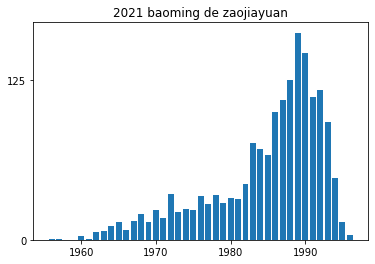

In [ ]:
# 2021交集的出生年份：
year_2021_jiaoji = intersected_df_2021['身份证号-出生年份'] .value_counts()
year_count_2021_jiaoji = year_2021_jiaoji.to_list()
year_name_2021_jiaoji = year_2021_jiaoji.index.to_list()
#year_name_2021.remove('')
year_name1_2021_jiaoji = []
for x in year_name_2021_jiaoji:
  year_name1_2021_jiaoji.append(int(x))
YearTuple_2021_jiaoji = zip(year_name1_2021_jiaoji, year_count_2021_jiaoji)
tempYearTuple_2021_jiaoji = sorted(YearTuple_2021_jiaoji, reverse=True)
yearName_2021_jiaoji = [i[0] for i in tempYearTuple_2021_jiaoji]
yearNum_2021_jiaoji = [i[1] for i in tempYearTuple_2021_jiaoji]
x_ticks_2021_jiaoji = np.arange(1940, 2000, 10)
plt.xticks(x_ticks_2021_jiaoji)
plt.yticks(np.arange(0, 1500, 125))
plt.title('2021 baoming de zaojiayuan')
plt.bar(yearName_2021_jiaoji, yearNum_2021_jiaoji)

In [ ]:
# 2021交集的资格证专业：
intersected_df_2021['资格证专业'] .value_counts()

建筑工程    1450
安装工程     271
市政工程       1
Name: 资格证专业, dtype: int64

### 2022报考信息

In [ ]:
#导入2020年报名人员的数据：
#https://docs.google.com/spreadsheets/d/12GYIqNYOIJt8Ks7xsbwvNN8N4N5JOWHv/edit?usp=sharing&ouid=117020772964111352188&rtpof=true&sd=true
id = "12GYIqNYOIJt8Ks7xsbwvNN8N4N5JOWHv"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('2022_zjz.xlsx')
zjz_2022 = pd.read_excel('2022_zjz.xlsx')
zjz_2022.head()

,姓名,身份证号,工作单位,个人学历,级别代码,级别名称,专业代码,专业名称
0,朱俊杰,622425********0618,中铁二十一局集团第二工程有限公司,大学本科,2,考全科,2,安装工程
1,王瑞红,622102********0683,酒泉市鸿泰园林科技开发有限公司,大学本科,2,考全科,1,土木建筑
2,火尊翠,620121********7520,兰州新区城市发展投资集团有限公司,专科教育,2,考全科,1,土木建筑
3,李梦林,610502********4415,陇南江南华源电力有限公司,大学本科,2,考全科,2,安装工程
4,陈元峰,622301********3930,甘肃威泰建设有限公司,专科教育,2,考全科,1,土木建筑


In [ ]:
zjz_2022['身份证号'] = zjz_2022['身份证号'].str.strip()
zjz_2022['身份证号-后四位'] = zjz_2022.身份证号.astype(str).str.slice(14,18)
zjz_2022['身份证号-出生地区'] = zjz_2022.身份证号.astype(str).str.slice(0,6)

In [ ]:
zjz_2022['专业名称'].value_counts()

土木建筑    6470
安装工程    1597
Name: 专业名称, dtype: int64

#### 和造价员交集

In [ ]:
# 1081名造价员报名2021年二级考试
intersected_df_2022 = pd.merge(zjz_2022, zjy_info, on=['姓名','身份证号-后四位'],suffixes=('_light',''))
intersected_df_2022 = intersected_df_2022[['姓名', '性别', '新证书资格编号', '资格证专业', '第二专业', '第三专业', '执业资格', '现执业单位','职称', '存档单位', '初始注册单位', '手机', '办公室', '地址', '邮政编码', '身份证号', '所在地', '民族','学历', '毕业时间', '毕业院校', '所学专业', '造价工作年限', '考试通过年度', '续期到期时间', '身份证号-出生地区','身份证号-出生年份', '身份证号-性别', '身份证号-后四位', '身份证号-地区码']]
intersected_df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081 entries, 0 to 1080
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   姓名         1081 non-null   object 
 1   性别         1006 non-null   object 
 2   新证书资格编号    1081 non-null   object 
 3   资格证专业      1081 non-null   object 
 4   第二专业       13 non-null     object 
 5   第三专业       10 non-null     object 
 6   执业资格       1081 non-null   object 
 7   现执业单位      1001 non-null   object 
 8   职称         1081 non-null   object 
 9   存档单位       105 non-null    object 
 10  初始注册单位     244 non-null    object 
 11  手机         1079 non-null   object 
 12  办公室        606 non-null    object 
 13  地址         868 non-null    object 
 14  邮政编码       609 non-null    float64
 15  身份证号       1081 non-null   object 
 16  所在地        986 non-null    object 
 17  民族         359 non-null    object 
 18  学历         840 non-null    object 
 19  毕业时间       1079 non-null   object 
 20  毕业院校    

In [ ]:
intersected_df_2022['资格证专业'].value_counts()

建筑工程    922
安装工程    158
市政工程      1
Name: 资格证专业, dtype: int64

<BarContainer object of 38 artists>

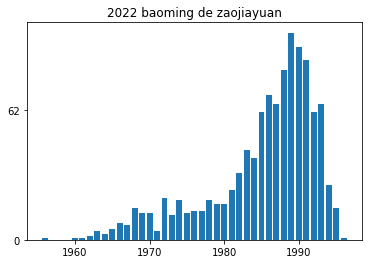

In [ ]:
# 2022交集的出生年份：
year_2022_jiaoji = intersected_df_2022['身份证号-出生年份'] .value_counts()
year_count_2022_jiaoji = year_2022_jiaoji.to_list()
year_name_2022_jiaoji = year_2022_jiaoji.index.to_list()
#year_name_2022.remove('')
year_name1_2022_jiaoji = []
for x in year_name_2022_jiaoji:
  year_name1_2022_jiaoji.append(int(x))
YearTuple_2022_jiaoji = zip(year_name1_2022_jiaoji, year_count_2022_jiaoji)
tempYearTuple_2022_jiaoji = sorted(YearTuple_2022_jiaoji, reverse=True)
yearName_2022_jiaoji = [i[0] for i in tempYearTuple_2022_jiaoji]
yearNum_2022_jiaoji = [i[1] for i in tempYearTuple_2022_jiaoji]
x_ticks_2022_jiaoji = np.arange(1940, 2000, 10)
plt.xticks(x_ticks_2022_jiaoji)
plt.yticks(np.arange(0, 1500, 62))
plt.title('2022 baoming de zaojiayuan')
plt.bar(yearName_2022_jiaoji, yearNum_2022_jiaoji)

### 2020 n 2021 

5680人 》2020 2021 all

2252人 》2020 2021 2022 all

4286人 》2021 2022 all

2965人 》2020 2022

In [ ]:
#2020年和2021年都报名的人数:5680
intersected_df_2020_2021 = pd.merge(zjz_2021, zjz_2020, on=['姓名','身份证号-后四位','身份证号-出生地区'], how='inner',suffixes=('','_right'))
intersected_df_2020_2021 = intersected_df_2020_2021[['姓名', '身份证号', '工作单位', '个人学历', '级别代码', '级别名称', '专业代码', '专业名称', '身份证号-后四位', '身份证号-出生地区', '身份证号-出生年份']]
intersected_df_2020_2021

,姓名,身份证号,工作单位,个人学历,级别代码,级别名称,专业代码,专业名称,身份证号-后四位,身份证号-出生地区,身份证号-出生年份
0,县乔,620502********2948,天水鸿顺达电力工程有限公司,专科教育,2,考全科,2,安装工程,2948,620502,1994
1,保杰,622201********4856,张掖市机电安装公司,专科教育,1,免一科,2,安装工程,4856,622201,1971
2,王旋,622424********0095,甘肃昊源工贸有限责任公司,专科教育,2,考全科,1,土木建筑,0095,622424,1995
3,白麒钰,622627********241X,甘肃银基建设工程有限公司,专科教育,2,考全科,1,土木建筑,241X,622627,1997
4,张伟山,620423********0336,甘肃德安建筑安装工程有限公司,专科教育,2,考全科,1,土木建筑,0336,620423,1995
...,...,...,...,...,...,...,...,...,...,...,...
5675,石慧娟,622726********2064,甘肃筑鼎建设有限责任公司,大学本科,1,免一科,1,土木建筑,2064,622726,1986
5676,吴文玉,620105********304X,甘肃省建材科研设计院有限责任公司,专科教育,1,免一科,1,土木建筑,304X,620105,1993
5677,李金龙,620201********0214,嘉峪关市第四建筑安装工程有限责任公司,专科教育,3,增项专业,2,安装工程,0214,620201,1988
5678,魏静静,620122********0247,兰州新区现代农业投资集团有限公司,大学本科,2,考全科,1,土木建筑,0247,620122,1993


#### 和造价员交集

In [ ]:
#1073名造价员同时报名2020 2021
intersected_df_2020_2021_zjy = pd.merge(intersected_df_2020_2021, zjy_info, on=['姓名','身份证号-后四位'],suffixes=('_light',''))
intersected_df_2020_2021_zjy = intersected_df_2020_2021_zjy[['姓名', '性别', '新证书资格编号', '资格证专业', '第二专业', '第三专业', '执业资格', '现执业单位','职称', '存档单位', '初始注册单位', '手机', '办公室', '地址', '邮政编码', '身份证号', '所在地', '民族','学历', '毕业时间', '毕业院校', '所学专业', '造价工作年限', '考试通过年度', '续期到期时间', '身份证号-出生地区','身份证号-出生年份', '身份证号-性别', '身份证号-后四位', '身份证号-地区码']]
intersected_df_2020_2021_zjy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 0 to 1072
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   姓名         1073 non-null   object 
 1   性别         991 non-null    object 
 2   新证书资格编号    1073 non-null   object 
 3   资格证专业      1072 non-null   object 
 4   第二专业       18 non-null     object 
 5   第三专业       12 non-null     object 
 6   执业资格       1073 non-null   object 
 7   现执业单位      988 non-null    object 
 8   职称         1073 non-null   object 
 9   存档单位       113 non-null    object 
 10  初始注册单位     292 non-null    object 
 11  手机         1073 non-null   object 
 12  办公室        551 non-null    object 
 13  地址         849 non-null    object 
 14  邮政编码       646 non-null    float64
 15  身份证号       1073 non-null   object 
 16  所在地        960 non-null    object 
 17  民族         373 non-null    object 
 18  学历         797 non-null    object 
 19  毕业时间       1073 non-null   object 
 20  毕业院校    

### 2021 n 2022

In [ ]:
zjz_2022.columns

Index(['姓名', '身份证号', '工作单位', '个人学历', '级别代码', '级别名称', '专业代码', '专业名称',
       '身份证号-后四位', '身份证号-出生地区'],
      dtype='object')

In [ ]:
#2021年和2022年都报名的人数: 4286
intersected_df_2021_2022 = pd.merge(zjz_2022, zjz_2021, on=['姓名','身份证号-后四位','身份证号-出生地区'], how='inner',suffixes=('','_right'))
intersected_df_2021_2022 = intersected_df_2021_2022[['姓名', '身份证号', '工作单位', '个人学历', '级别代码', '级别名称', '专业代码', '专业名称','身份证号-后四位', '身份证号-出生地区']]
intersected_df_2021_2022

,姓名,身份证号,工作单位,个人学历,级别代码,级别名称,专业代码,专业名称,身份证号-后四位,身份证号-出生地区
0,王瑞红,622102********0683,酒泉市鸿泰园林科技开发有限公司,大学本科,2,考全科,1,土木建筑,0683,622102
1,李梦林,610502********4415,陇南江南华源电力有限公司,大学本科,2,考全科,2,安装工程,4415,610502
2,陈元峰,622301********3930,甘肃威泰建设有限公司,专科教育,2,考全科,1,土木建筑,3930,622301
3,郑焕霖,620103********6013,甘肃省建筑装饰工程有限责任公司,专科教育,2,考全科,1,土木建筑,6013,620103
4,邢闻,620102********0022,甘肃第六建设集团股份有限公司,大学本科,2,考全科,1,土木建筑,0022,620102
...,...,...,...,...,...,...,...,...,...,...
4281,员召峰,610423********3050,国网庆阳供电公司,大学本科,2,考全科,2,安装工程,3050,610423
4282,莫昆锋,621102********5333,定西市安陇建筑安装有限责任公司,专科教育,3,增项专业,2,安装工程,5333,621102
4283,方春燕,620121********6028,中维信达项目管理咨询有限公司,专科教育,2,考全科,1,土木建筑,6028,620121
4284,郭红东,622626********7319,甘肃融晟源工程设计有限公司,专科教育,2,考全科,1,土木建筑,7319,622626


#### 和造价员交集

In [ ]:
# 704名造价员同时报名2021 2022
intersected_df_2021_2022_zjy = pd.merge(intersected_df_2021_2022, zjy_info, on=['姓名','身份证号-后四位','身份证号-出生地区'],suffixes=('_light',''))
intersected_df_2021_2022_zjy = intersected_df_2021_2022_zjy[['姓名', '性别', '新证书资格编号', '资格证专业', '第二专业', '第三专业', '执业资格', '现执业单位','职称', '存档单位', '初始注册单位', '手机', '办公室', '地址', '邮政编码', '身份证号', '所在地', '民族','学历', '毕业时间', '毕业院校', '所学专业', '造价工作年限', '考试通过年度', '续期到期时间', '身份证号-出生地区','身份证号-出生年份', '身份证号-性别', '身份证号-后四位', '身份证号-地区码']]
intersected_df_2021_2022_zjy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 703
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   姓名         704 non-null    object 
 1   性别         655 non-null    object 
 2   新证书资格编号    704 non-null    object 
 3   资格证专业      704 non-null    object 
 4   第二专业       10 non-null     object 
 5   第三专业       7 non-null      object 
 6   执业资格       704 non-null    object 
 7   现执业单位      654 non-null    object 
 8   职称         704 non-null    object 
 9   存档单位       64 non-null     object 
 10  初始注册单位     165 non-null    object 
 11  手机         702 non-null    object 
 12  办公室        391 non-null    object 
 13  地址         573 non-null    object 
 14  邮政编码       387 non-null    float64
 15  身份证号       704 non-null    object 
 16  所在地        648 non-null    object 
 17  民族         233 non-null    object 
 18  学历         534 non-null    object 
 19  毕业时间       703 non-null    object 
 20  毕业院校      

### 2020 n 2021 n 2022

In [ ]:
#2020,2021,2022年都报名的人数: 2252
intersected_df_2020_2021_2022 = pd.merge(intersected_df_2020_2021, zjz_2022, on=['姓名','身份证号-后四位','身份证号-出生地区'], how='inner',suffixes=('','_right'))
intersected_df_2020_2021_2022 = intersected_df_2020_2021_2022[['姓名', '身份证号', '工作单位', '个人学历', '级别代码', '级别名称', '专业代码', '专业名称','身份证号-后四位', '身份证号-出生地区']]
intersected_df_2020_2021_2022

,姓名,身份证号,工作单位,个人学历,级别代码,级别名称,专业代码,专业名称,身份证号-后四位,身份证号-出生地区
0,县乔,620502********2948,天水鸿顺达电力工程有限公司,专科教育,2,考全科,2,安装工程,2948,620502
1,王旋,622424********0095,甘肃昊源工贸有限责任公司,专科教育,2,考全科,1,土木建筑,0095,622424
2,白麒钰,622627********241X,甘肃银基建设工程有限公司,专科教育,2,考全科,1,土木建筑,241X,622627
3,张伟山,620423********0336,甘肃德安建筑安装工程有限公司,专科教育,2,考全科,1,土木建筑,0336,620423
4,张广乾,623021********4218,甘肃第六建设集团股份有限公司,专科教育,2,考全科,1,土木建筑,4218,623021
...,...,...,...,...,...,...,...,...,...,...
2247,廖赟,620121********4641,甘肃华炅建设工程有限公司,专科教育,2,考全科,1,土木建筑,4641,620121
2248,殷小兔,620522********2130,甘肃恒世春装饰有限公司,大学本科,2,考全科,1,土木建筑,2130,620522
2249,王宁,622727********2918,甘肃第三建设集团有限公司,大学本科,1,免一科,1,土木建筑,2918,622727
2250,石慧娟,622726********2064,甘肃筑鼎建设有限责任公司,大学本科,1,免一科,1,土木建筑,2064,622726


In [ ]:
intersected_df_2020_2021_2022['专业名称'].value_counts()

土木建筑    1722
安装工程     530
Name: 专业名称, dtype: int64

#### 和造价员交集

In [ ]:
# 463名造价员同时报名2020 2021 2022
intersected_df_2020_2021_2022_zjy = pd.merge(intersected_df_2020_2021_2022, zjy_info, on=['姓名','身份证号-后四位','身份证号-出生地区'],suffixes=('_light',''))
intersected_df_2020_2021_2022_zjy = intersected_df_2020_2021_2022_zjy[['姓名', '性别', '新证书资格编号', '资格证专业', '第二专业', '第三专业', '执业资格', '现执业单位','职称', '存档单位', '初始注册单位', '手机', '办公室', '地址', '邮政编码', '身份证号', '所在地', '民族','学历', '毕业时间', '毕业院校', '所学专业', '造价工作年限', '考试通过年度', '续期到期时间', '身份证号-出生地区','身份证号-出生年份', '身份证号-性别', '身份证号-后四位', '身份证号-地区码']]
intersected_df_2020_2021_2022_zjy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   姓名         463 non-null    object 
 1   性别         436 non-null    object 
 2   新证书资格编号    463 non-null    object 
 3   资格证专业      463 non-null    object 
 4   第二专业       8 non-null      object 
 5   第三专业       5 non-null      object 
 6   执业资格       463 non-null    object 
 7   现执业单位      428 non-null    object 
 8   职称         463 non-null    object 
 9   存档单位       42 non-null     object 
 10  初始注册单位     118 non-null    object 
 11  手机         463 non-null    object 
 12  办公室        257 non-null    object 
 13  地址         377 non-null    object 
 14  邮政编码       266 non-null    float64
 15  身份证号       463 non-null    object 
 16  所在地        425 non-null    object 
 17  民族         159 non-null    object 
 18  学历         347 non-null    object 
 19  毕业时间       463 non-null    object 
 20  毕业院校      

### 2020 U 2021 U 2022

In [ ]:
# 三年中，35500人次
all_df_2020_2021_2022 = zjz_2020.append(zjz_2021).append(zjz_2022)

In [ ]:
# 三年中，24821人参与
all_df_2020_2021_2022 = all_df_2020_2021_2022.drop_duplicates(subset=['姓名','身份证号-后四位','身份证号-出生地区'],keep='first')
all_df_2020_2021_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24821 entries, 0 to 8064
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   姓名         24821 non-null  object
 1   身份证号       24821 non-null  object
 2   工作单位       24821 non-null  object
 3   个人学历       24821 non-null  object
 4   级别代码       24821 non-null  int64 
 5   级别名称       24821 non-null  object
 6   专业代码       24821 non-null  int64 
 7   专业名称       24821 non-null  object
 8   身份证号-后四位   24821 non-null  object
 9   身份证号-出生地区  24821 non-null  object
 10  身份证号-出生年份  15609 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.3+ MB


#### 和造价员交集

In [ ]:
# 5981名造价员在三年内至少报名一次
all_df_2020_2021_2022_zjy = pd.merge(all_df_2020_2021_2022, zjy_info, on=['姓名','身份证号-后四位'],suffixes=('_light',''))
all_df_2020_2021_2022_zjy = all_df_2020_2021_2022_zjy[['姓名', '性别', '新证书资格编号', '资格证专业', '第二专业', '第三专业', '执业资格', '现执业单位','职称', '存档单位', '初始注册单位', '手机', '办公室', '地址', '邮政编码', '身份证号', '所在地', '民族','学历', '毕业时间', '毕业院校', '所学专业', '造价工作年限', '考试通过年度', '续期到期时间', '身份证号-出生地区','身份证号-出生年份', '身份证号-性别', '身份证号-后四位', '身份证号-地区码']]
all_df_2020_2021_2022_zjy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 5980
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   姓名         5981 non-null   object 
 1   性别         5305 non-null   object 
 2   新证书资格编号    5981 non-null   object 
 3   资格证专业      5980 non-null   object 
 4   第二专业       91 non-null     object 
 5   第三专业       73 non-null     object 
 6   执业资格       5981 non-null   object 
 7   现执业单位      5617 non-null   object 
 8   职称         5981 non-null   object 
 9   存档单位       688 non-null    object 
 10  初始注册单位     1343 non-null   object 
 11  手机         5974 non-null   object 
 12  办公室        3291 non-null   object 
 13  地址         4858 non-null   object 
 14  邮政编码       3510 non-null   float64
 15  身份证号       5981 non-null   object 
 16  所在地        5516 non-null   object 
 17  民族         1901 non-null   object 
 18  学历         4692 non-null   object 
 19  毕业时间       5959 non-null   object 
 20  毕业院校    

<BarContainer object of 41 artists>

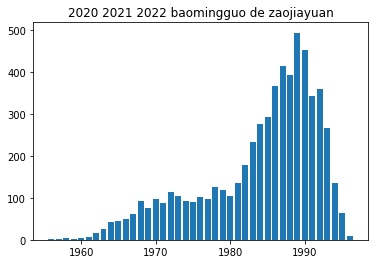

In [ ]:
#  报名过的造价员年龄分布
year_all_df_2020_2021_2022_zjy = all_df_2020_2021_2022_zjy['身份证号-出生年份'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
year_count_all_df_2020_2021_2022_zjy = year_all_df_2020_2021_2022_zjy.to_list()
year_name_all_df_2020_2021_2022_zjy = year_all_df_2020_2021_2022_zjy.index.to_list()
year_name_all_df_2020_2021_2022_zjy1 = []
for x in year_name_all_df_2020_2021_2022_zjy:
  year_name_all_df_2020_2021_2022_zjy1.append(int(x))
YearTuple = zip(year_name_all_df_2020_2021_2022_zjy1, year_count_all_df_2020_2021_2022_zjy)
tempYearTuple = sorted(YearTuple, reverse=True)
yearName = [i[0] for i in tempYearTuple]
yearNum = [i[1] for i in tempYearTuple]
x_ticks_zjy = np.arange(1940, 2000, 10)
plt.xticks(x_ticks_zjy)
plt.title('2020 2021 2022 baomingguo de zaojiayuan')
plt.bar(yearName, yearNum)

#### 和造价员差集

In [ ]:
dfall = pd.merge(zjz_2020[['姓名', '身份证号-出生地区', '身份证号-后四位']],zjz_2021[['姓名', '身份证号-出生地区', '身份证号-后四位']],on=['姓名', '身份证号-出生地区', '身份证号-后四位'], how='outer')

In [ ]:
dfall = pd.merge(dfall[['姓名', '身份证号-出生地区', '身份证号-后四位']],zjz_2022[['姓名', '身份证号-出生地区', '身份证号-后四位']],on=['姓名', '身份证号-出生地区', '身份证号-后四位'], how='outer')

In [ ]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24821 entries, 0 to 24820
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   姓名         24821 non-null  object
 1   身份证号-出生地区  24821 non-null  object
 2   身份证号-后四位   24821 non-null  object
dtypes: object(3)
memory usage: 775.7+ KB


In [ ]:
pd.merge(dfall, zjy_info,on=['姓名', '身份证号-出生地区', '身份证号-后四位'], how='left')

,姓名,身份证号-出生地区,身份证号-后四位,序号,性别,新证书资格编号,资格证专业,第二专业,第三专业,执业资格,...,学历,毕业时间,毕业院校,所学专业,造价工作年限,考试通过年度,续期到期时间,身份证号-出生年份,身份证号-性别,身份证号-地区码
0,汪如彬,622224,0512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,马秀娟,622722,0229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,王素贞,620102,4343,12399.0,女,甘110000507,建筑工程,None,None,甘肃省造价师,...,大专,2006-7-1,甘肃省建筑职业学院,工程造价,5,2011,43100.0,1982,4,甘肃省
3,王宇欣,620421,5157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,李振琪,620422,2715,9606.0,男,甘150001684,建筑工程,None,None,全国造价员,...,大专,42522.0,甘肃建筑职业技术学院,工程造价,None,2015,43100.0,1990,1,甘肃省
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24816,李学业,632126,2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24817,窦向斌,620521,3011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24818,方鑫,622322,0618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24819,秦大鹏,152628,7498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
